In [36]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [72]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/datos_master')
data = pd.read_csv('datos_sup_multiclase.csv')

# Cargar los datos
df = data.copy()


In [ ]:
import ta

# Suponiendo que ya tienes un DataFrame `df` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

# Calcular el Estocástico
df['stoch'] = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df['high'], df['low'], df['close'])
df['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df['mfi'] = ta.volume.MFIIndicator(df['high'], df['low'], df['close'], df['volume'], window=14).money_flow_index()


# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'], window=14)
df['aroon_up'], df['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df['high'], df['low'], df['close'], df['volume'], window=20).chaikin_money_flow()


# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df['close'], window=14)
df['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df['cci'] = ta.trend.CCIIndicator(df['high'], df['low'], df['close'], window=14).cci()

# Ahora puedes revisar el DataFrame con los indicadores calculados
print(df.head())



          date      open      high       low     close       volume symbol  \
19  26/08/2022  21563.81  21868.78  20115.00  20244.11  4770.011922    btc   
20  27/08/2022  20244.11  20371.80  19799.00  20043.30  2887.359237    btc   
21  28/08/2022  20043.30  20158.75  19526.89  19555.66  1754.101490    btc   
22  29/08/2022  19555.66  20427.41  19553.08  20293.48  2705.206325    btc   
23  30/08/2022  20293.48  20574.55  19541.52  19811.52  2888.176734    btc   

    rsi        macd        adx  ...         vwap  signal  stoch  mfi  \
19  NaN -461.248991  25.036391  ...  22193.04805       h    NaN  NaN   
20  NaN -567.826047  25.441507  ...  21927.79979       h    NaN  NaN   
21  NaN -683.755694  26.046904  ...  21712.36441       h    NaN  NaN   
22  NaN -707.934241  26.160138  ...  21399.42003       b    NaN  NaN   
23  NaN -757.256872  26.019729  ...  21175.25765       s    NaN  NaN   

    williams_r  aroon_up  aroon_down  cmf stoch_rsi  cci  
19         NaN       NaN         NaN  N

In [120]:
# Definir las columnas predictoras y la variable objetivo
# features = ['rsi', 'adp', 'adm', 'dri', 'dlogri']

#features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci', 'macd', 'adx', 'adp', 'adm', 'dri', 'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap']

#features = ['williams_r', 'cci', 'dri', 'dlogri']

features = ['rsi', 'stoch', 'williams_r', 'mfi', 'aroon_up', 'aroon_down', 'cmf', 'stoch_rsi', 'cci']

target = 'signal'

# Eliminar valores nulos
df = df.dropna()

# Separar variables predictoras y objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir clasificadores base
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = LogisticRegression(max_iter=1000, random_state=42)
clf3 = SVC(kernel='sigmoid', random_state=42)

# Crear el modelo de ensamblaje (VotingClassifier)
ensemble_clf = VotingClassifier(estimators=[
    ('rf', clf1), 
    ('lr', clf2), 
    ('svc', clf3)
], voting='hard')  # 'hard' vota por la clase más frecuente

# Entrenar el modelo de ensamblaje
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('svc', SVC(kernel='sigmoid', random_state=42))])

In [121]:
# Realizar predicciones
y_pred = ensemble_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7838
              precision    recall  f1-score   support

           b       0.20      0.01      0.02        92
           h       0.79      0.99      0.88       681
           s       0.50      0.01      0.02        92

    accuracy                           0.78       865
   macro avg       0.50      0.34      0.31       865
weighted avg       0.69      0.78      0.70       865



In [122]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_2 = pd.read_csv('datos_sol.csv')

# Cargar los datos
df_2 = data_2.copy()

In [124]:
import ta

# Suponiendo que ya tienes un DataFrame `df_2` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df_2['rsi'] = ta.momentum.RSIIndicator(df_2['close'], window=14).rsi()

# Calcular el Estocástico
df_2['stoch'] = ta.momentum.StochasticOscillator(df_2['high'], df_2['low'], df_2['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df_2['high'], df_2['low'], df_2['close'])
df_2['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df_2['mfi'] = ta.volume.MFIIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=14).money_flow_index()

# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df_2['high'], df_2['low'], window=14)
df_2['aroon_up'], df_2['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df_2['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=20).chaikin_money_flow()

# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df_2['close'], window=14)
df_2['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df_2['cci'] = ta.trend.CCIIndicator(df_2['high'], df_2['low'], df_2['close'], window=14).cci()


In [125]:
# Realizar las predicciones sobre todos los datos nuevos
df_2 = df_2.dropna()
X_sol = df_2[features]
predicciones_validacion = ensemble_clf.predict(X_sol)

# Agregar las predicciones como una nueva columna en el DataFrame
df_2['preds'] = predicciones_validacion


c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


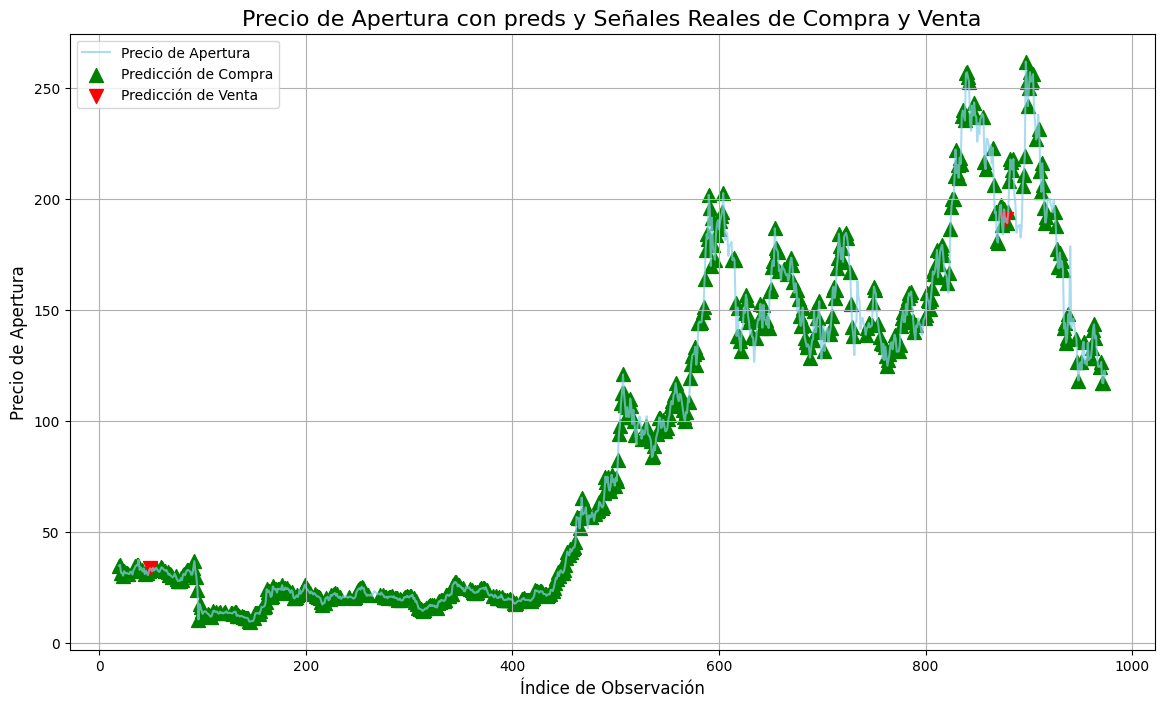

In [126]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df_2['open'], label='Precio de Apertura', color='skyblue', alpha=0.7)

# Añadir señales de predicción de compra y venta
plt.scatter(df_2.index[df_2['preds'] == "b"], df_2['open'][df_2['preds'] == "b"], 
            marker='^', color='green', label='Predicción de Compra', alpha=1, s=100)
plt.scatter(df_2.index[df_2['preds'] == "s"], df_2['open'][df_2['preds'] == "s"], 
            marker='v', color='red', label='Predicción de Venta', alpha=1, s=100)


# Personalización del gráfico
plt.title('Precio de Apertura con preds y Señales Reales de Compra y Venta', fontsize=16)
plt.xlabel('Índice de Observación', fontsize=12)
plt.ylabel('Precio de Apertura', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

# Supón que tienes un DataFrame df con tus características y la columna 'signal' como variable objetivo

# Definir las columnas predictoras y la variable objetivo
features = ['williams_r', 'cci', 'dri', 'dlogri']
target = 'signal'

# Eliminar valores nulos
df = df.dropna()

# Separar las variables predictoras y la variable objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar la importancia de las características
importances = rf.feature_importances_

# Crear un modelo de selección de características basado en la importancia
selector = SelectFromModel(rf, threshold="mean", max_features=None)
selector.fit(X_train, y_train)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Predecir con las características seleccionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Entrenar el modelo de nuevo solo con las características seleccionadas
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Predecir y evaluar el rendimiento del modelo
y_pred = rf_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))


Características seleccionadas: Index(['cci'], dtype='object')
              precision    recall  f1-score   support

           b       0.13      0.13      0.13        92
           h       0.79      0.79      0.79       681
           s       0.15      0.15      0.15        92

    accuracy                           0.66       865
   macro avg       0.36      0.36      0.36       865
weighted avg       0.65      0.66      0.65       865



In [119]:
df_2.to_csv('varificacion.csv', index=False)